In [1]:
import pandas as pd
import seaborn as sb
import pylab as py
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from folium import plugins
from geopy.geocoders import Nominatim
import datetime
import statsmodels.api as sm

In [2]:
df = pd.read_csv('microplastics-in-ocean.csv')
df.head()

,Year,Accumulated ocean plastic: Microplastics (<0.5cm),Yearly Microplastics Emission
0,1950,0,0
1,1951,0,0
2,1952,0,0
3,1953,0,0
4,1954,100,100


In [3]:
df.describe()

,Year,Accumulated ocean plastic: Microplastics (<0.5cm),Yearly Microplastics Emission
count,101.000000,1.010000e+02,101.000000
mean,2000.000000,5.180168e+05,26264.356436
std,29.300171,7.085749e+05,31584.418893
min,1950.000000,0.000000e+00,0.000000
25%,1975.000000,1.080000e+04,1500.000000
50%,2000.000000,1.545000e+05,11600.000000
75%,2025.000000,7.873000e+05,42100.000000
max,2050.000000,2.652700e+06,114700.000000


In [4]:
df.isnull().any()

Year                                                 False
Accumulated ocean plastic: Microplastics (<0.5cm)    False
Yearly Microplastics Emission                        False
dtype: bool

In [5]:
df = df.loc[(df['Year'] >= 1975) & (df['Year'] <= 2000)]
df.insert(0, 'Time', range(1, 1 + len(df)))
df = df.drop(["Accumulated ocean plastic: Microplastics (<0.5cm)"], axis = 1)
df.head()

,Time,Year,Yearly Microplastics Emission
25,1,1975,1500
26,2,1976,1800
27,3,1977,2000
28,4,1978,2200
29,5,1979,2500


In [35]:
df_cancer = pd.read_csv('cancer.csv')
df_cancer = df_cancer.loc[(df_cancer['Year'] >= 1985) & (df_cancer['Year'] <= 2010)]
df_cancer['Cancer incidence'] = df_cancer.sum(axis=1) - df_cancer["Year"]
df_cancer = pd.concat([df_cancer['Year'], df_cancer['Cancer incidence']], axis = 1)
# df_cancer.to_csv("world-cancer.csv")
df_cancer.head()

,Year,Cancer incidence
7,1985,369663
8,1986,373348
9,1987,389483
10,1988,460898
11,1989,497266


In [36]:
df_population = pd.read_csv("total-population.csv")
df_population = df_population.groupby("Year").sum()
df_population = df_population.reset_index()
df_population = df_population.loc[(df_population['Year'] >= 1985) & (df_population['Year'] <= 2010)]
df_population = df_population.reset_index()
df_population = df_population.drop(columns = ["index"])
df_population.head()

,Year,PopTotal
0,1985,1.916042e+08
1,1986,1.952506e+08
2,1987,1.989936e+08
3,1988,2.027761e+08
4,1989,2.065206e+08


In [37]:
df_cancer = pd.read_csv('cancer.csv')
df_cancer = df_cancer.loc[(df_cancer['Year'] >= 1985) & (df_cancer['Year'] <= 2010)]
df_cancer['Cancer Rate'] = df_cancer.sum(axis=1) - df_cancer["Year"]
df_cancer = df_cancer.reset_index()
df_cancer = df_cancer.drop(columns = ["index"])
df_cancer = pd.concat([df_cancer['Year'], df_cancer['Cancer Rate']], axis = 1)
df_cancer["Cancer Rate"] = df_cancer["Cancer Rate"]/ df_population["PopTotal"] *100

In [9]:
X = df
# X = X.reset_index().drop(columns = ["index","Year"])
X = X.reset_index().drop(columns = ["index","Year","Time"])

y = df_cancer['Cancer Rate']
y = y.reset_index().drop(columns = "index")
y = y.astype(float)

# Define the modell
X = sm.add_constant(X)
model = sm.OLS(y, X)

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())
# print(model_fit.rsquared)
# print(model_fit.rsquared_adj)
# print(model_fit.pvalues)
# print(model_fit.params)

                            OLS Regression Results                            
Dep. Variable:            Cancer Rate   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     276.8
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           1.11e-14
Time:                        00:32:12   Log-Likelihood:                 73.718
No. Observations:                  26   AIC:                            -143.4
Df Residuals:                      24   BIC:                            -140.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

/Users/justinaquak/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<AxesSubplot:xlabel='Yearly Microplastics Emission', ylabel='Cancer Rate'>

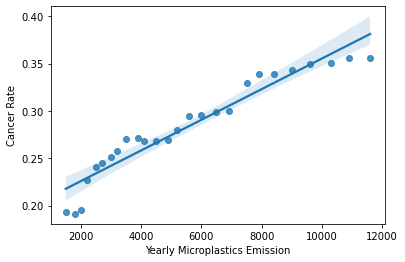

In [112]:
sb.regplot(x=X["Yearly Microplastics Emission"], y=y)

In [11]:
male_df = pd.read_csv('bmi/male-bmi.csv')
male_df = male_df.loc[(male_df['Year'] >= 1975) & (male_df['Year'] <= 2000)]
male_df = male_df.groupby(['Year']).median()
female_df = pd.read_csv('bmi/female-bmi.csv')
female_df = female_df.loc[(female_df['Year'] >= 1975) & (female_df['Year'] <= 2000)]
female_df = female_df.groupby(['Year']).median()
gender_df = pd.read_excel('bmi/gender-ratio.xlsx')
gender_df["Male_Per"] = gender_df["Male"]/(gender_df["Male"] + gender_df["Female"])
gender_df["Female_Per"] = 1 - gender_df["Male_Per"]
gender_df = gender_df.loc[(gender_df['Year'] >= 1975) & (gender_df['Year'] <= 2000)]
male_df = male_df.reset_index()
female_df = female_df.reset_index()
gender_df = gender_df.reset_index()
bmi_df = pd.DataFrame()
bmi_df["Year"] = gender_df["Year"]
bmi_df["BMI"] = male_df["Mean BMI (male)"]*gender_df["Male_Per"] + female_df["Mean BMI (female)"]*gender_df["Female_Per"]

bmi_df.head()

,Mean BMI (male)
Year,
1975,22.503931
1976,22.606440
1977,22.721816
1978,22.844646
1979,22.967261


In [50]:
alcohol_df = pd.read_csv('alcohol.csv')
alcohol_df = alcohol_df.loc[(alcohol_df['Year'] >= 1975) & (alcohol_df['Year'] <= 2000)]
alcohol_df = alcohol_df.groupby("Year").sum()
alcohol_df = alcohol_df.reset_index()
alcohol_df = alcohol_df.drop(columns = "Year")
alcohol_df.head()

,AlcAmt
0,1593.14
1,1593.13
2,1606.92
3,1588.51
4,1593.63


In [53]:
smoke_df = pd.read_csv('smoke.csv')
smoke_df = smoke_df.loc[(smoke_df['Year'] >= 1975) & (smoke_df['Year'] <= 2000)]
smoke_df = smoke_df.groupby("Year").median()
smoke_df = smoke_df.reset_index()
smoke_df = smoke_df.drop(columns = "Year")
smoke_df.head()

,Cig/Adult/Day
0,6.95
1,7.35
2,7.45
3,7.15
4,7.35


In [103]:
age_df = pd.read_csv('age.csv')
age_df = age_df.loc[(age_df['Year'] >= 1975) & (age_df['Year'] <= 2000)]
age_df = age_df.reset_index()
age_df = age_df.drop(columns = ["Year", "index"])
age_df.head()

,MedianAge
0,22.813298
1,22.995638
2,23.177977
3,23.360317
4,23.542656


In [38]:
X = df
# X = X.reset_index().drop(columns = ["index","Year"])
X = X.reset_index().drop(columns = ["index","Year","Time"])

y = df_cancer['Cancer Rate']
y = y.reset_index().drop(columns = "index")
y = y.astype(float)

# Define the modell
X = sm.add_constant(X)
model = sm.OLS(y, X)

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            Cancer Rate   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     276.8
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           1.11e-14
Time:                        02:54:23   Log-Likelihood:                 73.718
No. Observations:                  26   AIC:                            -143.4
Df Residuals:                      24   BIC:                            -140.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

/Users/justinaquak/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [42]:
X = df
# X = X.reset_index().drop(columns = ["index","Year"])
X = X.reset_index().drop(columns = ["index","Year","Time"])

# bmi df refactoring
bmi_df = bmi_df.drop(columns = ["index", "level_0"])
bmi_df = bmi_df.reset_index()

X = pd.concat([X, bmi_df], axis = 1)
X = X.drop(columns = ["index", "Year"])

y = df_cancer['Cancer Rate']
y = y.reset_index().drop(columns = "index")
y = y.astype(float)

# Define the modell
X = sm.add_constant(X)
model = sm.OLS(y, X)

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            Cancer Rate   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     329.9
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           1.16e-17
Time:                        02:55:00   Log-Likelihood:                 84.926
No. Observations:                  26   AIC:                            -163.9
Df Residuals:                      23   BIC:                            -160.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

/Users/justinaquak/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [114]:
X = df
# X = X.reset_index().drop(columns = ["index","Year"])
X = X.reset_index().drop(columns = ["index","Year","Time"])

# bmi df refactoring
# bmi_df = bmi_df.drop(columns = ["index", "level_0"])
bmi_df = bmi_df.reset_index()

# X = pd.concat([X, bmi_df, alcohol_df], axis = 1)
X = pd.concat([X, bmi_df, alcohol_df, smoke_df], axis = 1)
X = pd.concat([X, bmi_df, alcohol_df, smoke_df, age_df], axis = 1)
X = X.drop(columns = ["index", "Year"])

y = df_cancer['Cancer Rate']
y = y.reset_index().drop(columns = "index")
y = y.astype(float)

# Define the modell
X = sm.add_constant(X)
model = sm.OLS(y, X)

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            Cancer Rate   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     129.4
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           1.59e-14
Time:                        03:48:33   Log-Likelihood:                 86.444
No. Observations:                  26   AIC:                            -160.9
Df Residuals:                      20   BIC:                            -153.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

/Users/justinaquak/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [122]:
# X = X.drop(columns = "const")
new = pd.DataFrame()
new = pd.concat([X, y], axis = 1)
new.corr()

,Yearly Microplastics Emission,level_0,BMI,AlcAmt,Cig/Adult/Day,level_0,BMI,AlcAmt,Cig/Adult/Day,MedianAge,Cancer Rate
Yearly Microplastics Emission,1.000000,0.985795,0.978110,0.717660,-0.890603,0.985795,0.978110,0.717660,-0.890603,0.985795,0.959280
level_0,0.985795,1.000000,0.999030,0.706722,-0.919009,1.000000,0.999030,0.706722,-0.919009,1.000000,0.980894
BMI,0.978110,0.999030,1.000000,0.703646,-0.921608,0.999030,1.000000,0.703646,-0.921608,0.999030,0.982957
AlcAmt,0.717660,0.706722,0.703646,1.000000,-0.722600,0.706722,0.703646,1.000000,-0.722600,0.706722,0.715233
Cig/Adult/Day,-0.890603,-0.919009,-0.921608,-0.722600,1.000000,-0.919009,-0.921608,-0.722600,1.000000,-0.919009,-0.897865
level_0,0.985795,1.000000,0.999030,0.706722,-0.919009,1.000000,0.999030,0.706722,-0.919009,1.000000,0.980894
BMI,0.978110,0.999030,1.000000,0.703646,-0.921608,0.999030,1.000000,0.703646,-0.921608,0.999030,0.982957
AlcAmt,0.717660,0.706722,0.703646,1.000000,-0.722600,0.706722,0.703646,1.000000,-0.722600,0.706722,0.715233
Cig/Adult/Day,-0.890603,-0.919009,-0.921608,-0.722600,1.000000,-0.919009,-0.921608,-0.722600,1.000000,-0.919009,-0.897865
MedianAge,0.985795,1.000000,0.999030,0.706722,-0.919009,1.000000,0.999030,0.706722,-0.919009,1.000000,0.980894
